In [16]:
# Library importing
import networkx as nx
nd_list = []
G=nx.DiGraph()
G.add_edge("x","y")
G.add_edge("y",4)
G.add_edge("y",5)
G.add_edge(4,6)
nd_list.append("x")
nd_list.append("y")
nd_list.append(4)
nd_list.append(5)
nd_list.append(6)
print(nd_list)

['x', 'y', 4, 5, 6]


In [17]:
r = '#b41f1f'
g = '#1fb41f'
b = '#1f1fb4'
# nd_color = ["red", "red", "blue"]
# nd_color = ['red' if node=='SequenceWithMemoryNode0' else 'blue' for node in G.nodes()]

['SequenceWithMemoryNode0', 'SequenceWithMemoryNode2', 'ActionNode1', 'Calibrate3', 'ActionNode4']
SequenceWithMemoryNode0
SequenceWithMemoryNode2
ActionNode1
Calibrate3
ActionNode4
['red', 'green', 'blue', 'green', 'green']
5
['SequenceWithMemoryNode0', 'SequenceWithMemoryNode2', 'ActionNode1', 'Calibrate3', 'ActionNode4']
['SequenceWithMemoryNode0', 'SequenceWithMemoryNode2', 'ActionNode1', 'Calibrate3', 'ActionNode4']


KeyError: 0

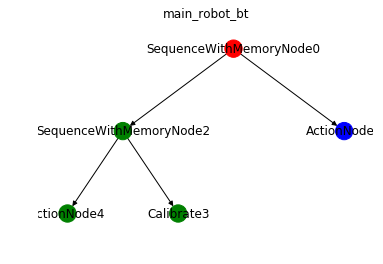

In [26]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 

    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.

    G: the graph (must be a tree)

    root: the root node of current branch 
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.

    width: horizontal space allocated for this branch - avoids overlap with other branches

    vert_gap: gap between levels of hierarchy

    vert_loc: vertical location of root

    xcenter: horizontal location of root
    '''
    root = next(iter(nx.topological_sort(G)))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

import matplotlib.pyplot as plt
G=nx.DiGraph()
# G.add_edges_from([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9), (4,10),
#                   (5,11), (5,12), (6,13)])
# G.add_edges_from([[1,2], [1,3]])



# massiv = ['SequenceWithMemoryNode0', 'ActionNode1', 'SequenceWithMemoryNode2', 'Calibrate3', 'ActionNode4']
massiv = []
G.add_edges_from([['SequenceWithMemoryNode0', 'ActionNode1'], ['SequenceWithMemoryNode0', 'SequenceWithMemoryNode2'], ['SequenceWithMemoryNode2', 'Calibrate3'], ['SequenceWithMemoryNode2', 'ActionNode4']])
for node in G:
    massiv.append(node)
print massiv
nd_color = [0 for i in range(len(G))]
for node in G:
    if node == 'SequenceWithMemoryNode' + str(0):
        nd_color[massiv.index(node)] = 'red'
    elif node == 'ActionNode1':
        nd_color[massiv.index(node)] = 'blue'
    else:
        nd_color[massiv.index(node)] = 'green'

# for n in G.nodes():
#     G.nodes[n]['color'] = 'b' if n == 'SequenceWithMemoryNode0' else 'g'
# colors = [node[1]['color'] for node in G.nodes(data=True)]
pos = hierarchy_pos(G,1)    
plt.title('main_robot_bt')
nx.draw(G, pos=pos, with_labels=True, node_color=nd_color)
# nx.draw(G, pos=pos, with_labels=True)
plt.savefig('/home/steplerchik/Desktop/main_bt.png')

for node in G:
    print node
print nd_color
print(len(G))
print G.nodes()
makaka = G.nodes()
print makaka
print makaka[0]

In [15]:
import os, glob
import subprocess

path = '/home/steplerchik/Desktop/'
for infile in glob.glob( os.path.join(path, 'main_bt.png')):
    viewer = subprocess.Popen(['gvfs-open', infile])
    # viewer.terminate()
    # viewer.kill()

In [9]:
t = []
p = [3,4]
# t.append(p)
# print(t)
print p.index(4)

1


In [5]:
level =0
t = [0 for x in range(100)]
t[level] = 'srat'

In [8]:

appa = ['stepka', 'nastya']
if appa[0][0] == 's':
    print 'suk'

suk


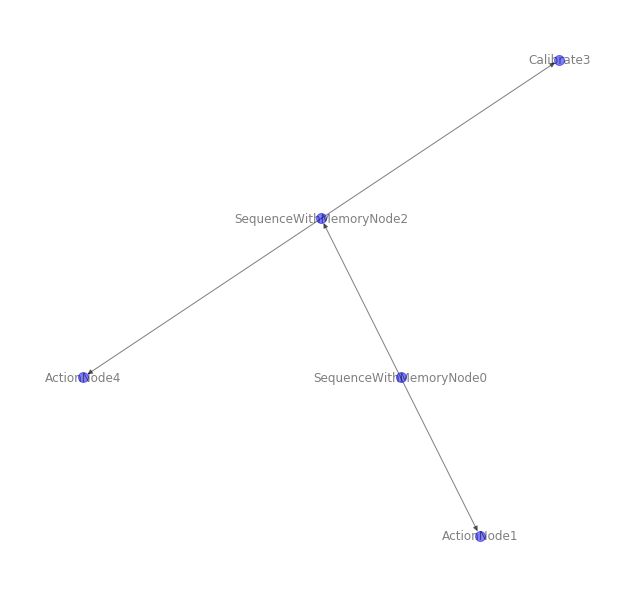

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")

# G = nx.balanced_tree(3, 5)
G=nx.DiGraph()
G.add_edges_from([['SequenceWithMemoryNode0', 'ActionNode1'], ['SequenceWithMemoryNode0', 'SequenceWithMemoryNode2'], ['SequenceWithMemoryNode2', 'Calibrate3'], ['SequenceWithMemoryNode2', 'ActionNode4']])

pos = graphviz_layout(G, prog='twopi', args='')
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=100, alpha=0.5, node_color="blue", with_labels=True)
# plt.axis('equal')
plt.show()


In [8]:
class SuperClass(object):
    def __init__(self, x):
        self.x = x
        
class SubClass(SuperClass):
    def __init__(self, y):
        self.y = y
        super(SubClass, self).__init__(y+1)
        print self.x

if __name__ == "__main__":
    a = SubClass(3)
    print a.__dict__


4
{'y': 3, 'x': 4}


In [18]:
import pygraphviz
import networkx as nx
G = nx.Graph()
G.add_node("ROOT")
for i in xrange(5):
    G.add_node("Child_%i" % i)
    G.add_node("Grandchild_%i" % i)
    G.add_node("Greatgrandchild_%i" % i)
    G.add_edge("ROOT", "Child_%i" % i)
    G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
    G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)

A = nx.nx_agraph.to_agraph(G)
A.layout('dot', args='-Nfontsize=10 -Gfontsize=8')
A.draw('test.png')

In [89]:
# List od strings
t2 = ['steady', 'ready', 'go']
# To str
t22 = ', '.join(t2)
# Back to list
t33 = t22.split(', ')

# List of tuples
p = [('we', 'er'), ('rt', 'ty'), ('typ', 'ryofyu')]
# To str
p1 = [' '.join(sub) for sub in p]
p3 = ', '.join(p1)
# Back to list of tuples
p4 = p3.split(', ')
p2 = [tuple(sub.split(' ')) for sub in p4]
print p
print p3
print type(p3)
print p2

[('we', 'er'), ('rt', 'ty'), ('typ', 'ryofyu')]
we er, rt ty, typ ryofyu
<type 'str'>
[('we', 'er'), ('rt', 'ty'), ('typ', 'ryofyu')]


In [6]:
my_list = [0, 1, 0, 0, 1]

print " ".join(map(str, my_list))

0 1 0 0 1
